# Milestone2: Data gathering and preprocessing (deadline: 30.03 noon)

## 1. Narrowing down the research question
### 1-1. Research Question

Rapping is a musical form of vocal delivery that incorporates "rhyme, rhythmic speech, and street vernacular",which is performed or chanted in a variety of ways, usually over a backing beat or musical accompaniment. The components of rap include "content" (what is being said), "flow" (rhythm, rhyme), and "delivery" (cadence, tone), while 'flow' being the most significant chracteristic of rap music, compared to other musical genres. Also, rap differs from spoken-word poetry in that it is usually performed in time to musical accompaniment. Being a primary ingredient of hip hop music, it is commonly associated with that genre in particular. 

Although rap in hiphop music share some common characterics, such as deemphasized pitch structures, emphasized rhythmic and poetic structure, and its key components, how they sounds differs a lot depending on their subgenre. For example, hardcore rap, a genre of hip hop music that developed through the East Coast hip hop scene in the 1980s,is generally characterized by anger, aggression and confrontation, whereas old-school rap, the earliest commercially recorded hip hop music around early 1980s, is noted for its relatively simple rapping techniques, compared to later hip hop music. Those different styles ae reflected in various aspects of the rap music, pitch, rhythm, rhyme, to name a few, so that a listener can hear the difference in flow while listening to different styles of rap songs.

In one of the musicology studies on rap music, general idea of rhythmic onset positions and the correlation between tempo and the release year has been analyzed. But still, genre-specific characteristics are hightly deprecated in the study. Moreover, there has been few musicology studies that investigate 'flows' of rap music, which took rather qualitative analysis on a very small number of samples. 

In our study, we aim to compare the rhythmic flow of rap music in different genres, in particular, gangsta-rap and old-school rap. By statistically analyzing sonic musicalities of different styles of rap music, we aim to discover and compare the ‘norm’ of each subgenre. 


### 1-2. Dataset

We are using the dataset of MCFlow, which is publically available on the website www.rapscience.net. 

M.C.Flow transcriptions are encoded as Humdrum-Syntax text files. Eight humdrum spines are used to encode information in each transcription. Each spine has it's own, original humdrum interpretation. The eight interpretations are:
- recipx : the rhythmic duration of syllables.
- stress : whether each syllable is stressed or unstressed.
- tone : formation about pitch accents and other notable pitch contours in flow, including boundary tones.
- break : the boundaries between prosodic units.
- rhyme : rhyme features on lyrics,including assonance, alliteration, and slant rhyme.
- ipa : the pronunciation of each syllable using the International Phonetic Alphabet.
- lyrics : The lyrics of the rap in normal English spelling, as well as some basic information about syntactic boundaries in the flow.
- hype : additional hype vocals that happen in a rap song.

Considering the fact that not all of the interpretations are present in the MCFlow dataset, and also the complexity of encoding stress, tone, rhype, and ipa on our own, we are using only 'recipx','break', and 'lyrics'. Using the selected interpretations, we can define the 'rhythmic flow' in several ways. In the current stage, there are two ways to define each 'flow':
- phrase-based: Flow breaks with a comma(,), period(.), or phrasal break in lyrics. This corresponds to the line break or semantic subphrase of lyrics.
- rest-based: Flow breaks with a rest. This neglects the lyrical details of the flow and focuses more on the syllabic onsets and rests.

In either case, we will be able to determine the syllable rate, the rhyme density, the average rhyme chain, the distribution of metric positions of syllables and rhymed syllables per flow. After we get flow characterists, we can know the flow tendency of each song, artist, and genre.



### 1-3. Adding inter-cultural (or inter-lingual) element to our study

Musical genre distinction is not universal. Musical pieces in same period, under the same genre, may sound differently, if they are from different languages or countries. This applies to contemporary rap genre as well. Different countries may have same 'old-school raps' that are completely differetn to each other. Or there might be some genres that exist only on certain countries.

In order to observe this inter-cultural difference of a certain rap genre, we aim to include a collection of Francophone rap (either old-school or gansta) in our dataset. There will 10~20 songs in our francophone dataset, chosen by its popularity within the selected subgenre. This new collection will be manually encoded by us, first in MusicMXL format, which will be converted into humdrum-syntax format, just as MCFlow dataset. The detailed methods will be discussed in section 2. 



### 1-4. Our expectation
At the end of our project, we are expecting to observe that songs from similar genres will show 'closer' distance and higher similarities towards songs from the same genre, compared to ones from another genre. We are assuming that the difference between anglophone gansta rap and anglophone old-school rap will be greater than the difference between the same genre from different languages/countries (i.e, differences between anglophone and francophone gangsta rap). Also, we are expecting to acquire a 'standard flow' for each hiphop subgenre. 


In order to verify our null hypothesis, we will define a distance function that can describe similarity between rap flows. The distance function should be able to handle vectors in different size(number of syllables) and weight values(rhythmic duration and stress). The smaller the distance, the more similar two flows are. The simpliest example of distance function will be cosine distance, but we will take more time to find (or design) the fuction that fits the given condition of our dataset.


## 2. Gathering the data

### 2-1. Anglophone dataset
As mentioned above, the anglophone is already online in MCFlow website(http://www.rapscience.net/Data/downloads.html). 124 songs are collected in a single zip file. Once unzipped these files can be easily read in any text editing program, or even loaded into spreadsheet software. Since our goal is not restoring the origial songs, bur rather statistically analyzing them, we are not using a Humdrum Toolkit to interpret the encoded songs. Instead, we are using pandas library for analysis. 

Whereas there are 124 songs in the dataset, the final dataset size may differ according to the genre selection and classification results. For the moment, we have two genres(gangsta and old-school), 26 songs each, which makes our anglophone dataset contain 52 songs.

### 2-2. Francophone dataset

As mentioned above, we will be encoding the francophone dataset on our own. This consists of three steps:

1. Select the songs to encode: select the songs, based on the popularity chart of the selected subgenre. Download the mp3 version of each song. Youtube download is also possible.
2. Encode songs into MusicXML format, by using an audio workstation studio software: Add the downloaded mp3 file into a new track of a workstation software. In our case, we are using Logic Pro. Determine the tempo and synchronize the beat of the song. Add another track. In the newly added track, tap a note when hearing a syllabic onset. Once finished tapping the whole rap part, add lyrics, rhyme positions, and breaks. Use different notes to store different information (for example, tap on note 'A' to mark a simple syllabic onset, and tap on 'C' to mark the start of a new phase, which is a 'break' point.) Export into MusicXML file
3. Format MusicXML files into Humdrum-Text files: Use python XML parser to reformulate teh MusicXML into Humdrum format.

In our drill, it took an entire day to encode recipx, stress, break, rhyme, and lyrics of a single song. Considering the possible errors of the very first trial and the effort needed to encode the stress interpretation as well - which we later decided to neglect in our studies - we are expecting to encode on average 3 songs per day. By the third milestone on April 20th, we expect to add maximum 20 new songs in our dataset, which corresponds to the number of songs per genre in anglophone dataset, 26. 

We have not completed parsing MusicXML file yet. However, since we are encoding the songs in the same way, one we figure out reformmating one of the francophone sample, we can apply that to the rest of the francophone dataset. Since encoding and reformmating can be done in parallel, we are still optimistic that we will be able to get 20 new Humdrum-formatted songs by the third milestone.

## 3. Data format

### 3-1. Anglophone sample
For the Anglophone dataset, the data are encoded in "kern format" and where each column correspond to as specific feature mentioned in previous section. (For example, column number one correspond to the rhythmic position and duration of the syllables, the second is the metrical position of the stressed/unstressed syllables) We have one file for each song and each verse is separated in the file. The data format is .rap, which is basically a text format that can be imported directly into pandas table.

In the milestone, we are using one of the songs in MCFlow dataset, Candy Shop by 50cents, to demonstrate how data manipulation works in the dataset.


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# load sample data
sample_path = 'data/sample/50Cent_CandyShop.rap'
sample = pd.read_table(sample_path)

In [28]:
sample.head(10)

,**recip,**stress,**tone,**break,**rhyme,**ipa,**lyrics,**hype
0,*M4/4,*M4/4,*M4/4,*M4/4,*M4/4,*M4/4,*M4/4,*M4/4
1,*MM98,*MM98,*MM98,*MM98,*MM98,*MM98,*MM98,*MM98
2,*>Verse1,*>Verse1,*>Verse1,*>Verse1,*>Verse1,*>Verse1,*>Verse1,*>Verse1
3,!MC:50 Cent,!MC:50 Cent,!,!MC:50 Cent,!MC:50 Cent,!MC:50 Cent,!MC:50 Cent,!MC:50 Cent
4,=0,=0,=0,=0,=0,=0,=0,=0
5,2,.,.,.,.,R,.,.
6,8,.,.,.,.,R,.,.
7,16,1,.,4,.,ju,You,.
8,16,0,.,.,.,kʊd,could,.
9,16,1,.,.,.,hæv,have,.


In [29]:
# check the rows with na 

sample[sample.isnull().any(axis=1)]
# na rows are metadata rows. We are safe to proceed.

,**recip,**stress,**tone,**break,**rhyme,**ipa,**lyrics,**hype
457,!!!OTL:Candy Shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,!!!RTL:the Massacre,NaN,NaN,NaN,NaN,NaN,NaN,NaN
459,!!!RRD:2005/01/15|2005/02/08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460,"!!!RRM:Shady, Aftermath",NaN,NaN,NaN,NaN,NaN,NaN,NaN
461,!!!RC#:004092,NaN,NaN,NaN,NaN,NaN,NaN,NaN
462,!!!BPP:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,!!!BPD:2005/03/05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464,!!!COC:50 Cent,NaN,NaN,NaN,NaN,NaN,NaN,NaN
465,!!!COL:50 Cent,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,!!!COM:Curtis James Jackson III,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# count the measure indicators and verse indicators
measures = sample['**recip'][sample['**recip'].apply(lambda x: '=' in x)]
verses = sample['**recip'][sample['**recip'].apply(lambda x: 'Verse' in x)]

print('# of measures: ', measures.shape[0])
print('# of verses: ', verses.shape[0])

# of measures:  33
# of verses:  2


In [50]:
# save only the rows that contains syllabic onset
sample_clean = sample[sample['**recip'].apply(lambda x: x[0] in '0123456789')]
sample_clean.head()

In [65]:
# humdrum analysis: rest-based

# get the rest points, so that we can split flow according to rests.
sample_clean[sample_clean['**ipa']=='R'].head(5)
print('number of rest points : {0}'.format(sample_clean[sample_clean['**ipa']=='R'].shape))
print('number of syllabic onset : {0}'.format(sample_clean.shape))

number of rest points : (34, 8)
number of syllabic onset : (418, 8)


In [60]:
breaks_idx = sample_clean[sample_clean['**ipa']=='R'].index
# add closing break point


# create a new dataframe that will show the flowwise analysis on this song
sample_flowwise = pd.DataFrame(columns=['recip','lyric'])


for i in range(breaks_idx.shape[0]-1):
    (start, end) = (breaks_idx[i], breaks_idx[i+1])
    snippet = sample_clean.iloc[start:end]
    sample_flowwise.at[i,'recip'] = snippet['**recip'].values
    sample_flowwise.at[i,'lyric'] = ' '.join(snippet['**lyrics'].values)
    
sample_flowwise.head(10)

,recip,lyric
0,[16],it
1,"[8, 8, 4., 16, 16, 16, 16, 16]",your way . How do you want it
2,"[16, 16, 16, 12, 12, 12]",. you gon' back that thing
3,"[16, 16, 16, 16, 16, 8, 16, 16, 16, 16, 16, 8,...",up or should I push up on it tem- -per- -ature...
4,"[8, 8, 8, 8, 16, 16, 16, 8, 32, 32, 16, 16, 16...",dance floor jam packed hot as a tea ke- -ttle ...
5,"[16, 16, 8, 16, 16, 16, 8, 16, 16, 8, 16, 16, ...",-by it's sim- -ple . if you be a nym- -pho . I be
6,"[16, 8, 8, 16, 16, 16, 8, 16]",a nym- -pho . in the ho- -tel
7,"[16, 16, 16, 16, 16, 16]",or in the back of the
8,"[8, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16...",ren- -tal on the beach or in the park . it's w...
9,"[16, 16, 16, 8., 8, 16, 16, 32, 32, 8, 16, 16,...",. I'm the love doc- -tor . have your friends t...


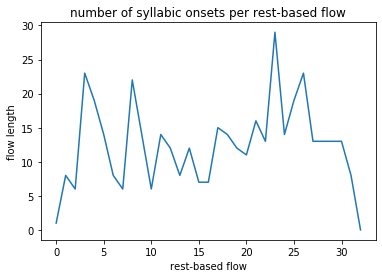

syllabic onset per rest-based flow - mean: 12.515151515151516, std: 6.270572203361968


In [68]:
# plot the syllabic length of each phrasal flow

plt.plot(sample_flowwise.recip.apply(len))
plt.xlabel('rest-based flow')
plt.ylabel('flow length')
plt.title('number of syllabic onsets per rest-based flow')
plt.show()


#average number of syllabic onset per phrasal flow
print('syllabic onset per rest-based flow - mean: {0}, std: {1}'.\
      format(sample_flowwise.recip.apply(len).mean(),\
             sample_flowwise.recip.apply(len).std()))

In [69]:
# humdrum analysis: phrase-based

print('number of level 2 break : {0}'.format(sample_clean[sample_clean['**break']=='2'].shape))
print('number of level 3 break : {0}'.format(sample_clean[sample_clean['**break']=='3'].shape))
print('number of level 4 break : {0}'.format(sample_clean[sample_clean['**break']=='4'].shape))
print('number of syllabic onset : {0}'.format(sample_clean.shape))

number of level 2 break : (4, 8)
number of level 3 break : (34, 8)
number of level 4 break : (5, 8)
number of syllabic onset : (418, 8)


In [70]:
# according to the description on the website and our common knowledge of interpreting the lyrics,
# we concluded that only level 3,4 break are meaningful.

breaks_idx = sample_clean[sample_clean['**break'].apply(lambda x: x in ['3','4'])].index
# add closing break point


# create a new dataframe that will show the flowwise analysis on this song
sample_flowwise = pd.DataFrame(columns=['recip','lyric'])


for i in range(breaks_idx.shape[0]-1):
    (start, end) = (breaks_idx[i], breaks_idx[i+1])
    snippet = sample_clean.iloc[start:end]
    sample_flowwise.at[i,'recip'] = snippet['**recip'].values
    sample_flowwise.at[i,'lyric'] = ' '.join(snippet['**lyrics'].values)
    
sample_flowwise.head(10)

,recip,lyric
0,"[8, 4., 16, 16, 16, 16, 16, 16]",way . How do you want it .
1,"[16, 16, 12, 12, 12, 16]",you gon' back that thing up
2,"[16, 16, 16, 16, 8, 16, 16, 16, 16, 16, 8, 16,...",or should I push up on it tem- -per- -ature ri...
3,"[16, 16, 16, 16, 16, 8]",. let's go to the next
4,"[16, 8, 8, 8, 8, 8, 16, 16, 16, 8, 32]",le- -vel dance floor jam packed hot as a tea ke-
5,"[32, 16, 16, 16, 16, 8, 16, 16, 8, 16, 16]",-ttle . I break it down for you now ba- -by
6,"[16, 8, 16, 16, 16, 8, 16, 16, 8, 16, 16, 16, ...",it's sim- -ple . if you be a nym- -pho . I be a
7,"[8, 8, 16, 16, 16, 8, 16, 16, 16, 16, 16, 16, ...",nym- -pho . in the ho- -tel or in the back of ...
8,"[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]",on the beach or in the park . it's what- -e- -ver
9,"[16, 8, 16, 16, 16, 8, 8, 16, 16, 16, 16, 8., ...",you in- -to got the ma- -gic stick . I'm the l...


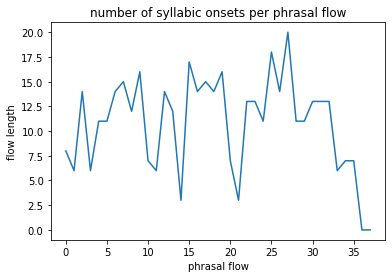

syllabic onset per phrasal flow - mean: 10.81578947368421, std: 4.837104691064547


In [71]:
# plot the syllabic length of each phrasal flow

plt.plot(sample_flowwise.recip.apply(len))
plt.xlabel('phrasal flow')
plt.ylabel('flow length')
plt.title('number of syllabic onsets per phrasal flow')
plt.show()

#average number of syllabic onset per phrasal flow
print('syllabic onset per phrasal flow - mean: {0}, std: {1}'.\
      format(sample_flowwise.recip.apply(len).mean(),\
             sample_flowwise.recip.apply(len).std()))

In [72]:
# things we might explore:
# how are recipxs distributed in each flow?

### 3-2. Francophone sample



So far we worked on encoding a sample song by using Logic Pro, and we are still working on parsing it into humdrum. Since the main work was tapping in the workstation software, it is hard to demonstrate the work in Jupyter notebook. Still, we are presenting the result of the encoding for one song: a part of the resulting partition and a part of the corresponding MusicXML file:

![image](https://user-images.githubusercontent.com/42543702/77852917-799af480-71e1-11ea-881b-78e312370731.png)


![image](https://user-images.githubusercontent.com/42543702/77852998-d7c7d780-71e1-11ea-8789-d1c2987c6398.png)

